In [1]:
import os
import warnings
import pandas as pd
import numpy as np
import scanpy as sc
import custom_tools
import anndata as ad
import seaborn as sns
import decoupler as dc
import plotting
from pathlib import Path
from matplotlib import rcParams
import matplotlib.pyplot as plt
from dataset import TissueDataset
from pathlib import Path
import matplotlib


warnings.simplefilter(action='ignore')
sc.settings.verbosity = 0
# Set figure params
sc.set_figure_params(scanpy=True, facecolor="white", dpi=80, dpi_save=300)


/home/rifaioglu/miniconda3/envs/py_gem/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Read json file
# exp_name = "GATV2_NegativeLogLikelihood_month_04-12-2023"
# job_id = "fombnNMthdocYhDPmAjaBQ"
exp_name = "METABRIC"
dataset_name = "METABRIC"
job_id = "METABRIC"
PLT_PATH = f"../plots/analysis/{exp_name}_{job_id}"
Path(PLT_PATH).mkdir(parents=True, exist_ok=True)
device =  custom_tools.get_device()
args  = custom_tools.load_json(f"../models/{exp_name}/{job_id}.json")

plotting.visualize_clinical_data(plt_path=PLT_PATH)

# args["num_node_features"] = 33
deg = None
if "PNA" in exp_name:
    deg = custom_tools.load_pickle(f"../models/{exp_name}/{job_id}_deg.pckl")
model = custom_tools.load_model(f"{job_id}_SD", path = f"../models/{exp_name}", model_type = "SD", args = args, deg=deg, device=device)
dataset = TissueDataset(os.path.join(f"../data/{dataset_name}", "month"),  "month")

# Read the explanations adata
adata_exp = sc.read_h5ad(f"../data/out_data/adatafiles/{dataset_name}/{exp_name}_{job_id}_concatenated_explanations.h5ad")
adata_exp.obs_names_make_unique()

# for mod in model.modules():
#    print(mod)

"""

# Read json file
# exp_name = "METABRIC_GATV2_CoxPHLoss_10_fold_gpusaez_14-04-2024"
# job_id = "vuF_GvxYKM6o_m0VUINsMw"
exp_name = "METABRIC"
job_id = "9U43MVNB9CQHuwnTN6t0kg"
device =  custom_tools.get_device()
args  = custom_tools.load_json(f"../models/{exp_name}/{job_id}.json")
# args["num_node_features"] = 33
deg = None
if "PNA" in exp_name:
    deg = custom_tools.load_pickle(f"../models/{exp_name}/{job_id}_deg.pckl")
model = custom_tools.load_model(f"{job_id}_SD", path = f"../models/{exp_name}", model_type = "SD", args = args, deg=deg, device=device)


dataset = TissueDataset(os.path.join("../data/METABRIC", "month"),  "month")"""

GPU is available on this device!


Seed set to 42


Clinical data columns:  Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status', 'Subtype'],
      dtype='obje

Seed set to 42


Target prediction: OSmonth


'\n\n# Read json file\n# exp_name = "METABRIC_GATV2_CoxPHLoss_10_fold_gpusaez_14-04-2024"\n# job_id = "vuF_GvxYKM6o_m0VUINsMw"\nexp_name = "METABRIC"\njob_id = "9U43MVNB9CQHuwnTN6t0kg"\ndevice =  custom_tools.get_device()\nargs  = custom_tools.load_json(f"../models/{exp_name}/{job_id}.json")\n# args["num_node_features"] = 33\ndeg = None\nif "PNA" in exp_name:\n    deg = custom_tools.load_pickle(f"../models/{exp_name}/{job_id}_deg.pckl")\nmodel = custom_tools.load_model(f"{job_id}_SD", path = f"../models/{exp_name}", model_type = "SD", args = args, deg=deg, device=device)\n\n\ndataset = TissueDataset(os.path.join("../data/METABRIC", "month"),  "month")'

<Figure size 640x480 with 0 Axes>

Clinical data columns:  Index(['Study ID', 'Patient ID', 'Sample ID', 'Age at Diagnosis',
       'Type of Breast Surgery', 'Cancer Type', 'Cancer Type Detailed',
       'Cellularity', 'Chemotherapy', 'Pam50 + Claudin-low subtype', 'Cohort',
       'ER status measured by IHC', 'ER Status', 'Neoplasm Histologic Grade',
       'HER2 status measured by SNP6', 'HER2 Status',
       'Tumor Other Histologic Subtype', 'Hormone Therapy',
       'Inferred Menopausal State', 'Integrative Cluster',
       'Primary Tumor Laterality', 'Lymph nodes examined positive',
       'Mutation Count', 'Nottingham prognostic index', 'Oncotree Code',
       'Overall Survival (Months)', 'Overall Survival Status', 'PR Status',
       'Radio Therapy', 'Relapse Free Status (Months)', 'Relapse Free Status',
       'Number of Samples Per Patient', 'Sample Type', 'Sex',
       '3-Gene classifier subtype', 'TMB (nonsynonymous)', 'Tumor Size',
       'Tumor Stage', 'Patient's Vital Status', 'Subtype'],
      dtype='obje

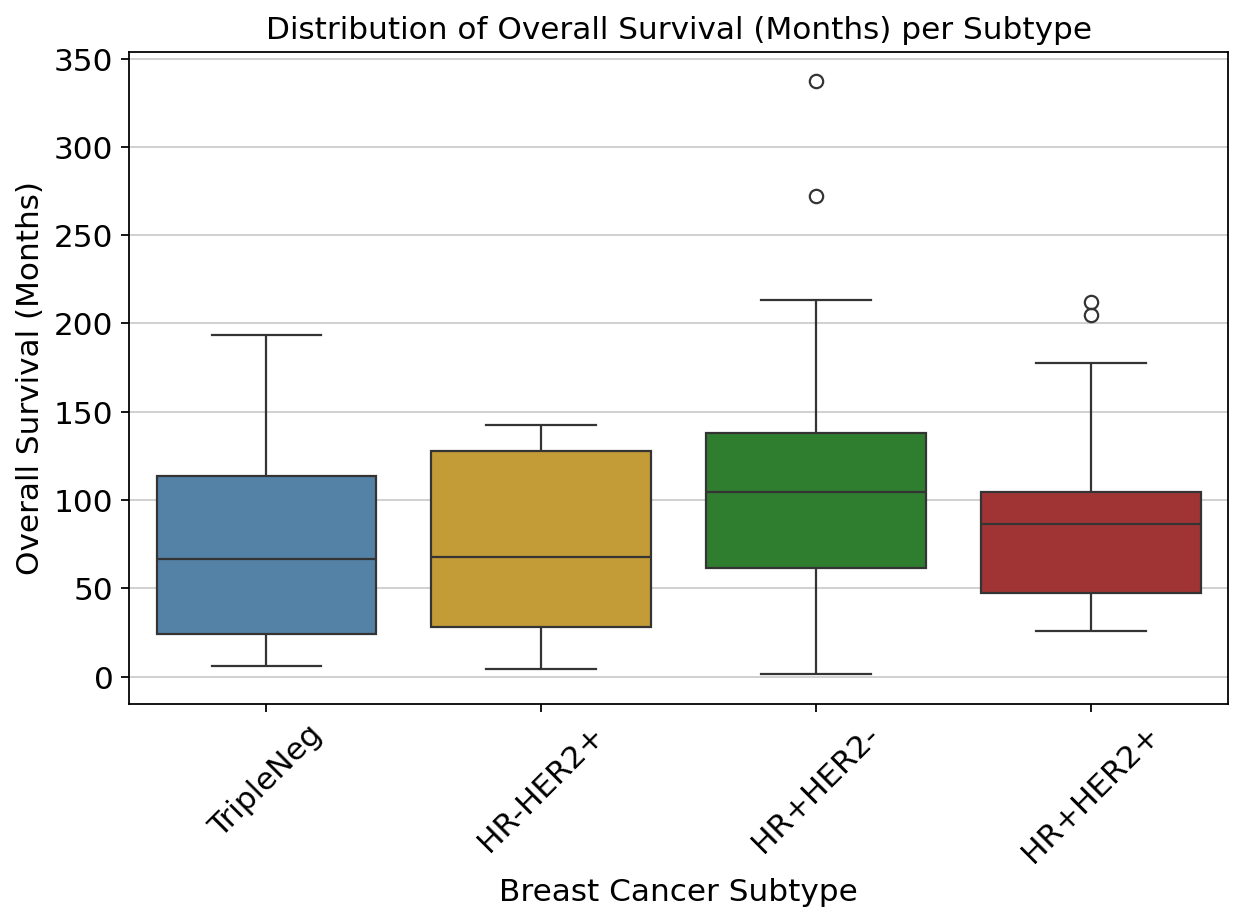

In [3]:
def classify_breast_cancer(row):
    er = row['ER Status']
    pr = row['PR Status']
    her2 = row['HER2 Status']
    
    hr_positive = (er == 'Positive') or (pr == 'Positive')

    if not hr_positive and her2 == 'Negative':
        return 'TripleNeg'
    elif not hr_positive and her2 == 'Positive':
        return 'HR-HER2+'
    elif hr_positive and her2 == 'Negative':
        return 'HR+HER2-'
    elif hr_positive and her2 == 'Positive':
        return 'HR+HER2+'
    else:
        return np.nan  # In case of unexpected values

c_data  = pd.read_csv("../data/METABRIC/brca_metabric_clinical_data.tsv", sep="\t", index_col=False)
s_c_data = pd.read_csv("../data/METABRIC/single_cell_data.csv", index_col=False)
c_data.columns = c_data.columns.str.strip()
c_data['Subtype'] = c_data.apply(classify_breast_cancer, axis=1)
# Print columns
print("Clinical data columns: ", c_data.columns)
print("Single cell data columns: ", s_c_data.columns)

# Keep rows in c_data with PIDs in single_cell_data
c_data = c_data[c_data["Patient ID"].isin(s_c_data["metabricId"])]

# Define custom order
custom_order = ["TripleNeg", "HR-HER2+", "HR+HER2-", "HR+HER2+"]

# Define darker shades
my_pal = {"TripleNeg": "#4682B4",  # Steel Blue (Darker Blue)
          "HR-HER2+": "#DAA520",   # Goldenrod (Darker Yellow)
          "HR+HER2-": "#228B22",   # Forest Green (Darker Green)
          "HR+HER2+": "#B22222"}   # Firebrick (Darker Red)

# Set figure size
plt.figure(figsize=(8, 6))

# Create the box plot with pastel colors
sns.boxplot(data=c_data, x='Subtype', y='Overall Survival (Months)', 
            order=custom_order, palette=my_pal)

# Improve plot readability
plt.xticks(rotation=45)
plt.title('Distribution of Overall Survival (Months) per Subtype')
plt.xlabel('Breast Cancer Subtype')
plt.ylabel('Overall Survival (Months)')
plt.tight_layout()

# Show plot
plt.show()

In [4]:
c_data  = pd.read_csv("../data/METABRIC/brca_metabric_clinical_data.tsv", sep="\t", index_col=False)

In [5]:
analysis_vars  = ['CK19', 'CK8_18', 'CD68', 'SMA',
       'Vimentin', 'HER2', 'CD3', 'Slug', 'ER',
       'PR', 'CD45', 'GATA3', 'CD20', 'Beta_catenin',
       'CAIX', 'Ki67', 'EGFR', 'CK7', 'panCK',
       'CK5', 'Fibronectin']

adata_exp = adata_exp[:, analysis_vars]

In [6]:
""" CK8/
CK18, CK19, CK5, CD68, CD3, CD20, ER, PR, CD45, GATA3, CK7, Ki67, SMA,
HER2, pan-CK, EGFR, TP53, β-catenin, vWF/CD31, CAIX, Slug and vimentin."""

' CK8/\nCK18, CK19, CK5, CD68, CD3, CD20, ER, PR, CD45, GATA3, CK7, Ki67, SMA,\nHER2, pan-CK, EGFR, TP53, β-catenin, vWF/CD31, CAIX, Slug and vimentin.'

In [7]:
imp_threshold = 0.75
# Get the importance of the nodes
node_importance = np.array(adata_exp.obs["importance"])
node_imp_thr = np.quantile(node_importance, imp_threshold)

importances_hard_v2 = np.array(node_importance > node_imp_thr, dtype="str")
# print("importances_hard", importances_hard)
importances_hard_v2 = pd.Series(importances_hard_v2, dtype="category")
# print(importances_hard)
adata_exp.obs["importance_hard"] = importances_hard_v2.values

In [8]:
import embeddings
emd, related_data = embeddings.get_intermediate_embeddings_for_dataset(model, dataset, batch_size=1)
emd_cnv, related_data_cnv = embeddings.get_intermediate_embeddings_for_dataset(model, dataset, mode="CNV", batch_size=1)

In [9]:
embedding_arr = np.array(emd[0])
pid_list, img_id_list, osmonth_lst,  clinical_type_lst, tumor_grade_lst, censor_lst= [], [], [], [], [], []
for data in related_data:
    pid_list.append(str(data.p_id[0]))
    osmonth_lst.append(data.osmonth.item())
    img_id_list.append(data.img_id[0])
    clinical_type_lst.append(data.clinical_type[0])
    # print(data.tumor_grade)
    tumor_grade_lst.append(str(data.tumor_grade[0]))
    # print(data.is_censored)
    censor_lst.append(data.is_censored[0].item())
embedding_arr.shape

(1078, 256)

In [10]:
adata_emb = ad.AnnData(embedding_arr)
adata_emb.var_names = [f"emb_{i}" for i in range(embedding_arr.shape[1])]
adata_emb.obs_names = img_id_list
adata_emb.obs["img_id"] = img_id_list
adata_emb.obs["img_id"] = adata_emb.obs["img_id"].astype("category")
adata_emb.obs["osmonth"] = osmonth_lst
adata_emb.obs["p_id"] = pid_list
adata_emb.obs["clinical_type"] = clinical_type_lst
adata_emb.obs["tumor_grade"] = tumor_grade_lst
adata_emb.obs["is_censored"] = censor_lst

In [11]:
sc.tl.pca(adata_emb, svd_solver='arpack', random_state=0)
sc.pp.neighbors(adata_emb)
sc.tl.leiden(adata_emb, key_added = "leiden", resolution=0.1)
new_res_param = 0.1
sc.tl.leiden(adata_emb, restrict_to=('leiden', ["1"]),  resolution=new_res_param, key_added='leiden_clust')

adata_emb.obs['leiden_clust'][adata_emb.obs['leiden_clust'].isin(['1,1', '1,0', '2'])]='1,0'
adata_emb.obs['leiden_clust']=adata_emb.obs['leiden_clust'].astype('str').astype('category')
### Reorder and rename the Leiden
adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str')) #, inplace=True)

new_res_param = 0.1
sc.tl.leiden(adata_emb, restrict_to=('leiden_clust', ["0"]),  resolution=new_res_param, key_added='leiden_clust')

adata_emb.obs['leiden_clust'][adata_emb.obs['leiden_clust'].isin(['1,1', '1,0', '2'])]='1,0'
### Reorder and rename the Leiden

adata_emb.obs['leiden_clust'] = adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str')) #, inplace=True)

adata_emb.obs['leiden_clust'][adata_emb.obs['leiden_clust'].isin(['0', '1'])]='1'
adata_emb.obs['leiden_clust']=adata_emb.obs['leiden_clust'].astype('str').astype('category')
### Reorder and rename the Leiden
adata_emb.obs['leiden_clust'] = adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str')) #, inplace=True)s


# subclustering 1
sc.tl.leiden(adata_emb, restrict_to=('leiden_clust', ["1"]),  resolution=new_res_param, key_added='leiden_clust')
adata_emb.obs['leiden_clust']=adata_emb.obs['leiden_clust'].astype('str').astype('category')
### Reorder and rename the Leiden
adata_emb.obs['leiden_clust'] = adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str'))

# subclustering 1
sc.tl.leiden(adata_emb, restrict_to=('leiden_clust', ["3"]),  resolution=new_res_param, key_added='leiden_clust')
adata_emb.obs['leiden_clust']=adata_emb.obs['leiden_clust'].astype('str').astype('category')
### Reorder and rename the Leiden
adata_emb.obs['leiden_clust'] = adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str'))

adata_emb.obs['leiden_clust'][adata_emb.obs['leiden_clust'].isin(['3', '5'])]='3'
adata_emb.obs['leiden_clust']=adata_emb.obs['leiden_clust'].astype('str').astype('category')
adata_emb.obs['leiden_clust'] = adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str'))


adata_emb.obs['leiden_clust'][adata_emb.obs['leiden_clust'].isin(['4', '2', '1'])]='1'
adata_emb.obs['leiden_clust']=adata_emb.obs['leiden_clust'].astype('str').astype('category')
adata_emb.obs['leiden_clust'] = adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str'))

"""sc.tl.leiden(adata_emb, restrict_to=('leiden', ["1"]),  resolution=new_res_param, key_added='leiden_clust')
adata_emb.obs['leiden_clust']=adata_emb.obs['leiden_clust'].astype('str').astype('category')
### Reorder and rename the Leiden
adata_emb.obs['leiden_clust'] = adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str'))"""

"""sc.tl.leiden(adata_emb, restrict_to=('leiden_clust', ["0"]),  resolution=new_res_param, key_added='leiden_clust')
adata_emb.obs['leiden_clust']=adata_emb.obs['leiden_clust'].astype('str').astype('category')
### Reorder and rename the Leiden
adata_emb.obs['leiden_clust'] = adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str'))"""


"""sc.tl.leiden(adata_emb, restrict_to=('leiden_clust', ["3"]),  resolution=new_res_param, key_added='leiden_clust')
adata_emb.obs['leiden_clust']=adata_emb.obs['leiden_clust'].astype('str').astype('category')
### Reorder and rename the Leiden
adata_emb.obs['leiden_clust'] = adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str'))"""

"""sc.tl.leiden(adata_emb, restrict_to=('leiden_clust', ["4"]),  resolution=new_res_param, key_added='leiden_clust')
adata_emb.obs['leiden_clust']=adata_emb.obs['leiden_clust'].astype('str').astype('category')
adata_emb.obs['leiden_clust'] = adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str')) """

"""adata_emb.obs['leiden_clust'][adata_emb.obs['leiden_clust'].isin(['4', '6'])]='4'
adata_emb.obs['leiden_clust']=adata_emb.obs['leiden_clust'].astype('str').astype('category')
### Reorder and rename the Leiden
adata_emb.obs['leiden_clust'] = adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str'))"""

"""adata_emb.obs['leiden_clust'][adata_emb.obs['leiden_clust'].isin(['3', '2', '5'])]='2'
adata_emb.obs['leiden_clust']=adata_emb.obs['leiden_clust'].astype('str').astype('category')
adata_emb.obs['leiden_clust'] = adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str')) #, inplace=True)s"""

"""adata_emb.obs['leiden_clust'][adata_emb.obs['leiden_clust'].isin(['4', '2'])]='2'
adata_emb.obs['leiden_clust']=adata_emb.obs['leiden_clust'].astype('str').astype('category')
adata_emb.obs['leiden_clust'] = adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str')) #, inplace=True)s
"""
"""

adata_emb.obs['leiden_clust'][adata_emb.obs['leiden_clust'].isin(['0', '1'])]='0'
adata_emb.obs['leiden_clust']=adata_emb.obs['leiden_clust'].astype('str').astype('category')
adata_emb.obs['leiden_clust'] = adata_emb.obs['leiden_clust'].cat.rename_categories(np.arange(len(np.unique(adata_emb.obs['leiden_clust']))).astype('str')) #, inplace=True)s
"""
sc.tl.umap(adata_emb)
# sc.pl.umap(adata, color=["osmonth", "leiden"])
upper_quartile = int(np.quantile(adata_emb.obs["osmonth"], 0.75))
lower_quartile = int(np.quantile(adata_emb.obs["osmonth"], 0.25))

adata_emb.obs["high_surv"]="0"
adata_emb.obs["low_surv"]="0"

adata_emb.obs.loc[adata_emb.obs["osmonth"]>upper_quartile, "high_surv" ] = "1"
adata_emb.obs.loc[adata_emb.obs["osmonth"]<lower_quartile, "low_surv" ] = "1"



0 0
1 1
2 2


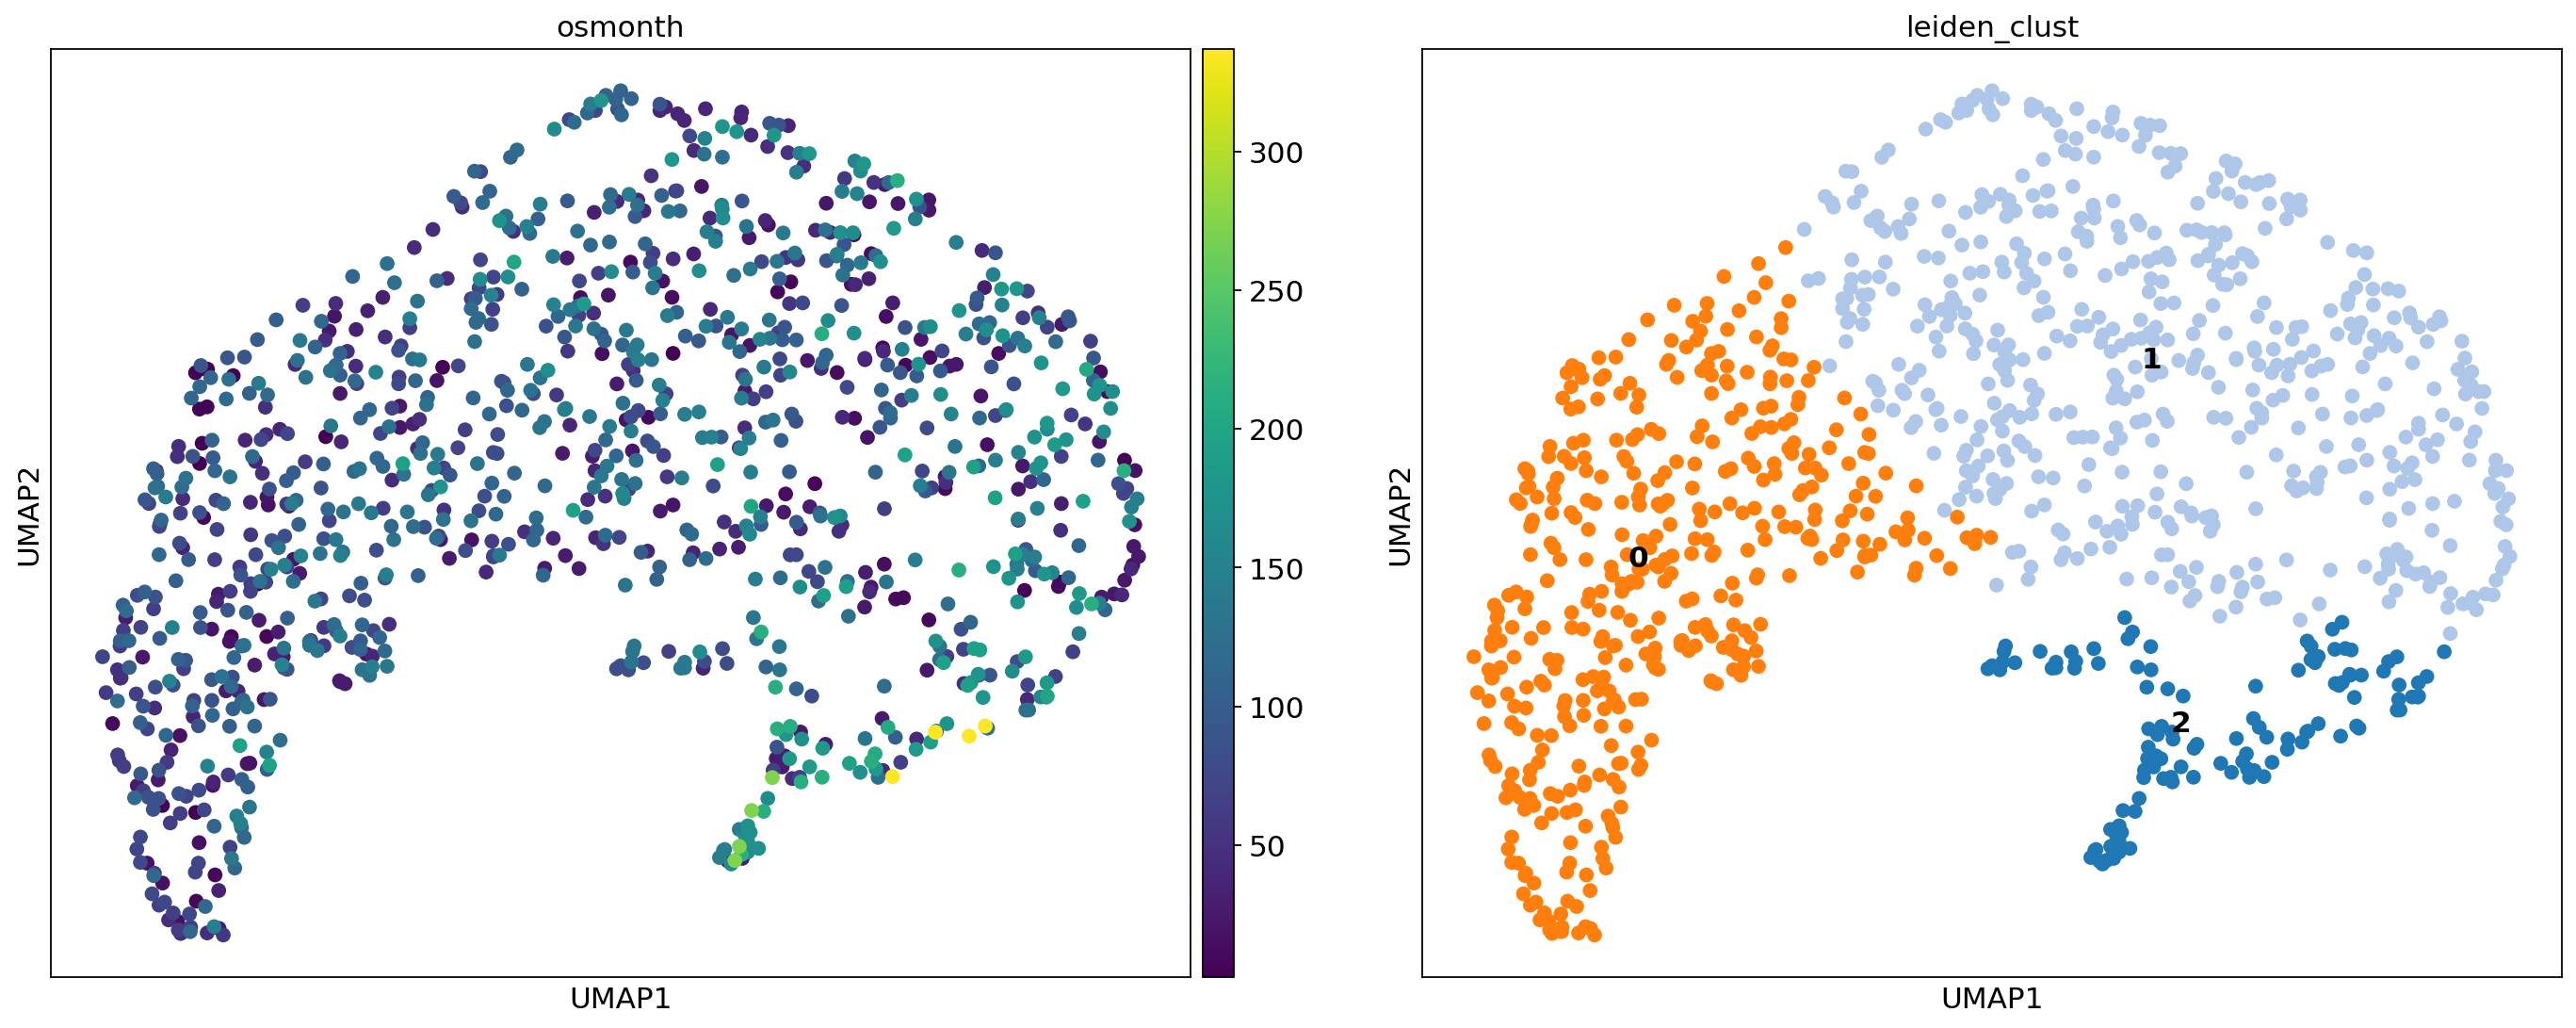

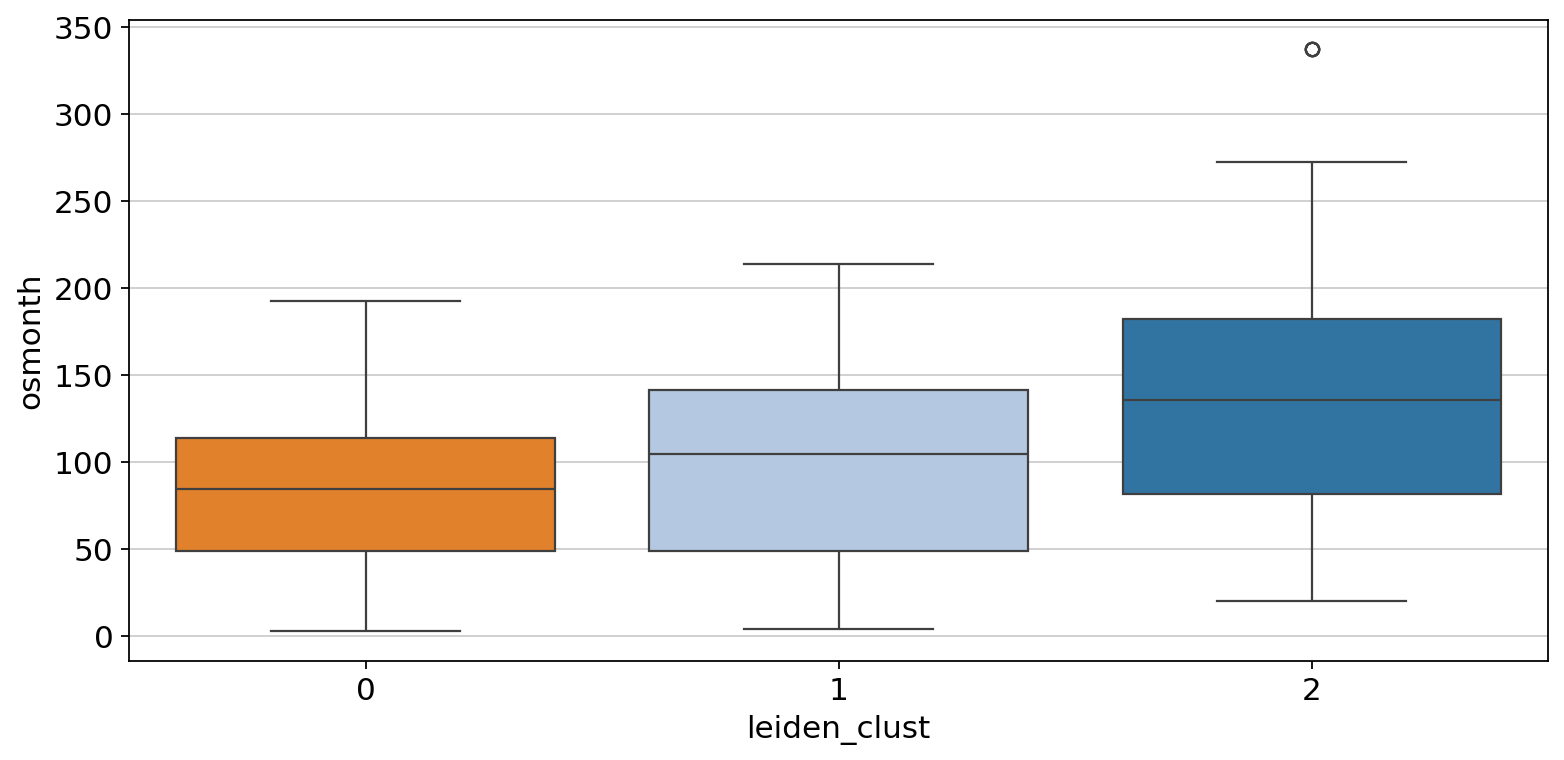

In [12]:
cmap = sns.palettes.get_colormap("tab20")
color_dict = dict()

for ind, clust_index in enumerate(adata_emb.obs["leiden_clust"].cat.categories):
    print(clust_index, ind)
    color_dict[str(len(adata_emb.obs["leiden_clust"].cat.categories)-int(clust_index)-1)] = cmap.colors[ind]

rcParams['figure.figsize']=(10,8)
sc.pl.umap(adata_emb, color=["osmonth", "leiden_clust"], size = 200, palette=color_dict,show=False, legend_loc = 'on data')
plt.tight_layout()

plt.savefig(os.path.join(PLT_PATH, f"{dataset_name}_embedding_umap.pdf"), dpi=300)


fig = plt.figure(figsize=(10, 5))
sns.boxplot(data=adata_emb.obs, x="leiden_clust", y="osmonth", palette= color_dict)
plt.tight_layout()
plt.savefig(os.path.join(PLT_PATH, f"{dataset_name}_embedding_boxplot.pdf"), dpi=300)
# sc.pl.umap(adata, color=["leiden"], palette=color_dict, legend_loc = 'on data')
# sc.pl.umap(adata, color=["high_surv", "low_surv"], palette=["grey", "black"])
# sc.pl.umap(adata, color=["is_censored"], palette=["grey", "black"])

# sc.pl.dotplot(adata, n_genes=5, groupby='bulk_labels', dendrogram=True)

# sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
# sc.pl.rank_genes_groups_dotplot(adata, n_genes=5, key=f"t-test", show=True, groupby=f"leiden")

<h2>Create Pseudobulk Profile (Important Nodes)</h2>

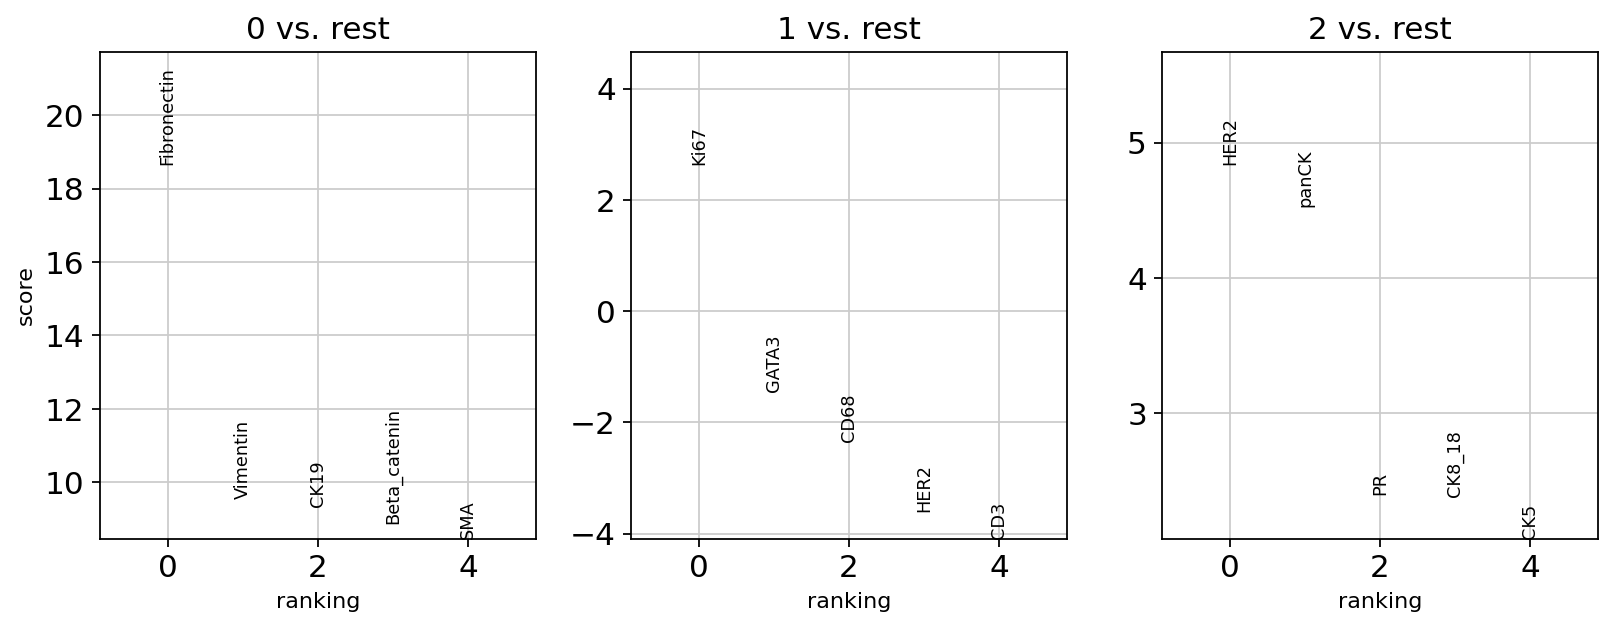

<Figure size 320x320 with 0 Axes>

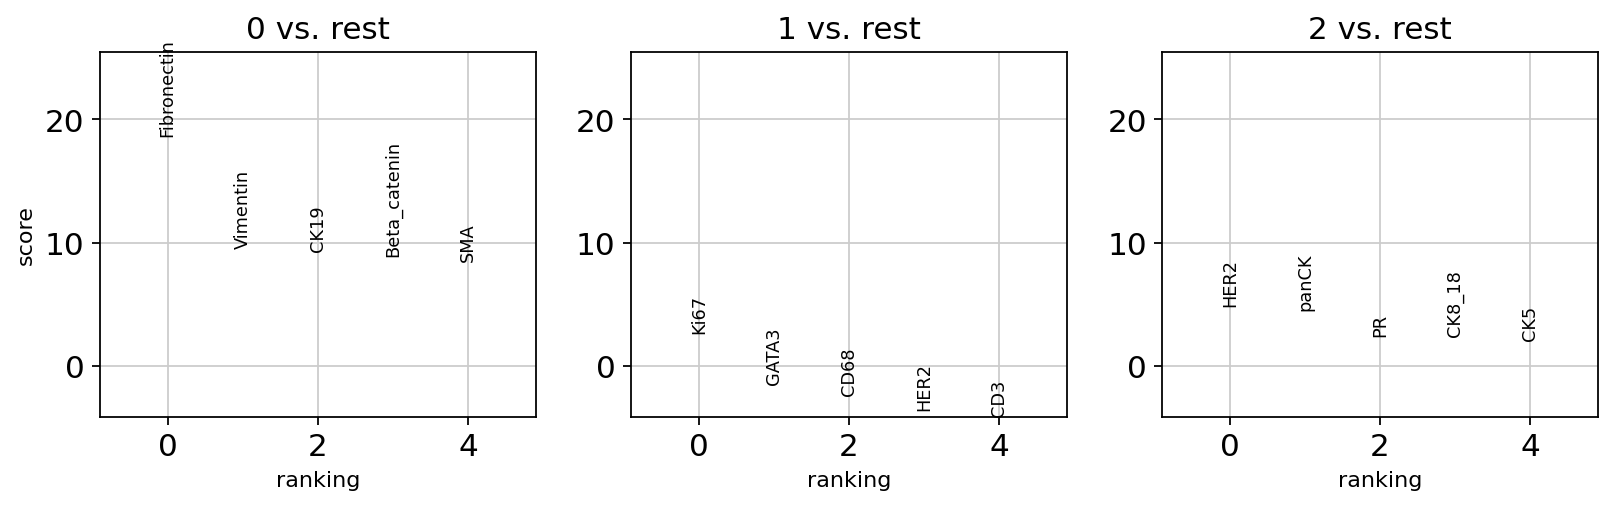

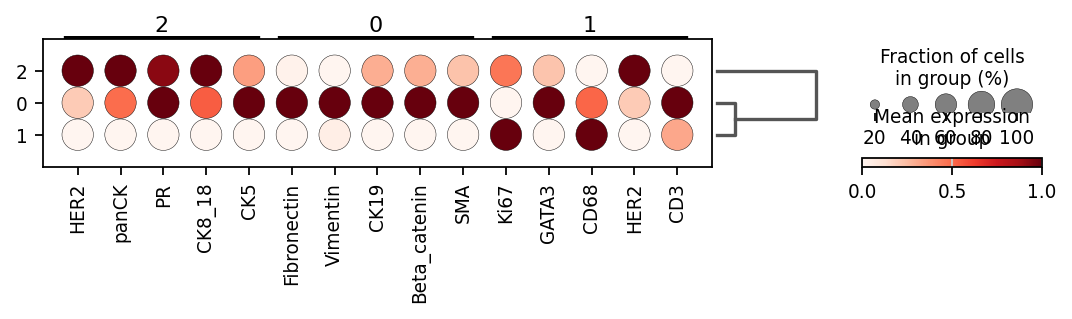

In [13]:
import decoupler as dc
pdata_imp_vs_unimp = dc.get_pseudobulk(
    adata_exp,
    
    sample_col='img_id',
    groups_col='importance_hard',
    mode='mean',
    min_cells=0,
    min_counts=0
)

pdata_imp_vs_unimp.obs_names
pdata_imp = pdata_imp_vs_unimp[pdata_imp_vs_unimp.obs_names.str.contains("True"),:].copy()
new_obs_names = [obs_n.split("_")[0] for obs_n in pdata_imp.obs_names]
pdata_imp.obs_names = new_obs_names

pdata_imp.obs["leiden_clust"] = adata_emb.obs["leiden_clust"]
pdata_imp.obsm["X_umap"] = adata_emb.obsm["X_umap"]



sc.tl.rank_genes_groups(pdata_imp, groupby=f"leiden_clust", method='wilcoxon', key_added = f"wilcoxon_all")

rcParams['figure.figsize']=(4,4)
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'axes.labelsize' : 10}) 

sc.pl.rank_genes_groups(pdata_imp, n_genes=5, sharey=False,  key=f"wilcoxon_all", show=True, groupby="leiden_clust")
plt.tight_layout()
# plt.savefig(os.path.join(PLT_PATH, f"{dataset_name}_psedu_imp_ranking.pdf"), dpi=300)

rcParams['figure.figsize']=(4,3)
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'axes.labelsize' : 10}) 
sc.pl.rank_genes_groups(pdata_imp, n_genes=5, standard_scale='var', key=f"wilcoxon_all", figsize = (8,8), show=False, groupby="leiden_clust")
sc.pl.rank_genes_groups_dotplot(pdata_imp, n_genes=5, standard_scale='var', key=f"wilcoxon_all", figsize = (8,8), show=False, groupby="leiden_clust")
plt.gcf().subplots_adjust(top = 0.60, bottom=0.50)
plt.savefig(os.path.join(PLT_PATH, f"{dataset_name}_psedu_imp_dotplot_one_vs_all.pdf"), dpi=300)
plt.savefig(os.path.join(PLT_PATH, f"{dataset_name}_psedu_imp_dotplot_one_vs_all.png"), dpi=300)

In [14]:
# TODO: Add leiden clusters to adata_exp

for cat in adata_emb.obs["leiden_clust"].cat.categories:
    img_ids = adata_emb[adata_emb.obs["leiden_clust"]==cat].obs["img_id"].cat.categories
    adata_exp.obs.loc[adata_exp.obs["img_id"].isin(img_ids), "leiden_clust"] = cat

# print(sorted(adata_emb[adata_emb.obs["leiden"]=="0"].obs["img_id"].cat.categories))

In [15]:
adata_exp.obs.groupby("importance_hard").agg("count")

,clinical_type,img_id,p_id,tumor_grade,osmonth,importance,cell_type,leiden_clust
importance_hard,,,,,,,,
False,303263,303263,303263,303263,303263,303263,303263,303263
True,101088,101088,101088,101088,101088,101088,101088,101088


In [16]:
def plot_cell_type_proportion(adata, group_col="leiden", obs_col = "cell_type", fl_path = None):
    group_list = list(adata.obs[group_col].cat.categories)
    c_type_list = list(adata.obs[obs_col].cat.categories)
    # print(len(c_type_list))
    #c_type_list.remove("Large elongated")
    #c_type_list.remove("Macrohage")
    """if obs_col=="cell_type" and "Macrophage" in c_type_list:
        c_type_list.remove("Macrophage")"""
    print(len(c_type_list))
    c_type_list = c_type_list[:20]
    for cond in group_list:
        adata_tmp = adata[adata.obs[group_col]==cond,:]
        for c_type in c_type_list:
            if adata_tmp[adata_tmp.obs[obs_col]==c_type].shape[0]<8:
                print(c_type, adata_tmp[adata_tmp.obs[obs_col]==c_type].shape[0])
                c_type_list.remove(c_type)
            # print(c_type, adata_tmp[adata_tmp.obs[obs_col]==c_type].shape[0])
            # cond_arr[-1].append(100*(adata_tmp[adata_tmp.obs[obs_col]==c_type].shape[0]/adata_tmp.shape[0]))
    print(c_type_list)
    
    cond_prop = dict()
    cond_arr = []
    for cond in group_list:
        cond_arr.append([])
        # print(cond, cond_arr)
        cond_prop[cond] = []
        adata_tmp = adata[adata.obs[group_col]==cond,:]
        sum = 0
        for c_type in c_type_list:


            cond_arr[-1].append(100*(adata_tmp[adata_tmp.obs[obs_col]==c_type].shape[0]/(adata_tmp[adata_tmp.obs[obs_col].isin(c_type_list),:].shape[0])))

    data = np.array(cond_arr).T
    # print("data", data.shape)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    # cmap = matplotlib.cm.get_cmap('tab20')
    # print(cmap.colors)
    
    X = np.arange(data.shape[1])
    
    for i in range(data.shape[0]):
        print(data[i], c_type_list[i])
        ax1.bar(X, data[i],bottom = np.sum(data[:i], 
                    axis =0), width= 0.85, color = cmap.colors[i], label=c_type_list[i]  )

    ax1.set_xticks([0,1,2])
    ax1.set_xticklabels(group_list) # , rotation=45)
    ax1.set_xlabel("Cluster", fontweight='bold')
    ax1.set_ylabel("Proportion (%)", fontweight='bold')
    ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.subplots_adjust(bottom=0.45)
    fig.tight_layout()
    if fl_path:
        plt.savefig(fl_path)

    plt.show()



22
Hypoxia 3
['B cells', 'Basal CKlow', 'Endothelial', 'Fibroblasts', 'Fibroblasts CD68+', 'HER2+', 'HR+ CK7-', 'HR+ CK7- Ki67+', 'HR+ CK7- Slug+', 'HR- CK7+', 'HR- CK7-', 'HR- CKlow CK5+', 'HR- Ki67+', 'HRlow CKlow', 'Macrophages Vim+ CD45low', 'Macrophages Vim+ Slug+', 'Macrophages Vim+ Slug-', 'Myoepithelial', 'Myofibroblasts']
[0.74319281 0.97017028 1.04964539] B cells
[0.863272   0.95406787 0.38297872] Basal CKlow
[1.38253335 0.53943078 0.62411348] Endothelial
[13.37747055 13.37103981 10.04255319] Fibroblasts
[2.76506669 4.37180468 3.0141844 ] Fibroblasts CD68+
[0.72696589 1.51161386 1.05673759] HER2+
[28.9098757  25.68535888 35.15602837] HR+ CK7-
[3.0376789  4.93941468 3.19148936] HR+ CK7- Ki67+
[2.44377373 1.59615152 0.4822695 ] HR+ CK7- Slug+
[10.64161231  4.16851173  8.17021277] HR- CK7+
[ 6.29928926 10.68394992 12.37588652] HR- CK7-
[0.41540908 0.64007085 0.55319149] HR- CKlow CK5+
[3.00197968 3.64317056 2.41134752] HR- Ki67+
[ 2.48596372 10.06400709  8.58156028] HRlow CKlow


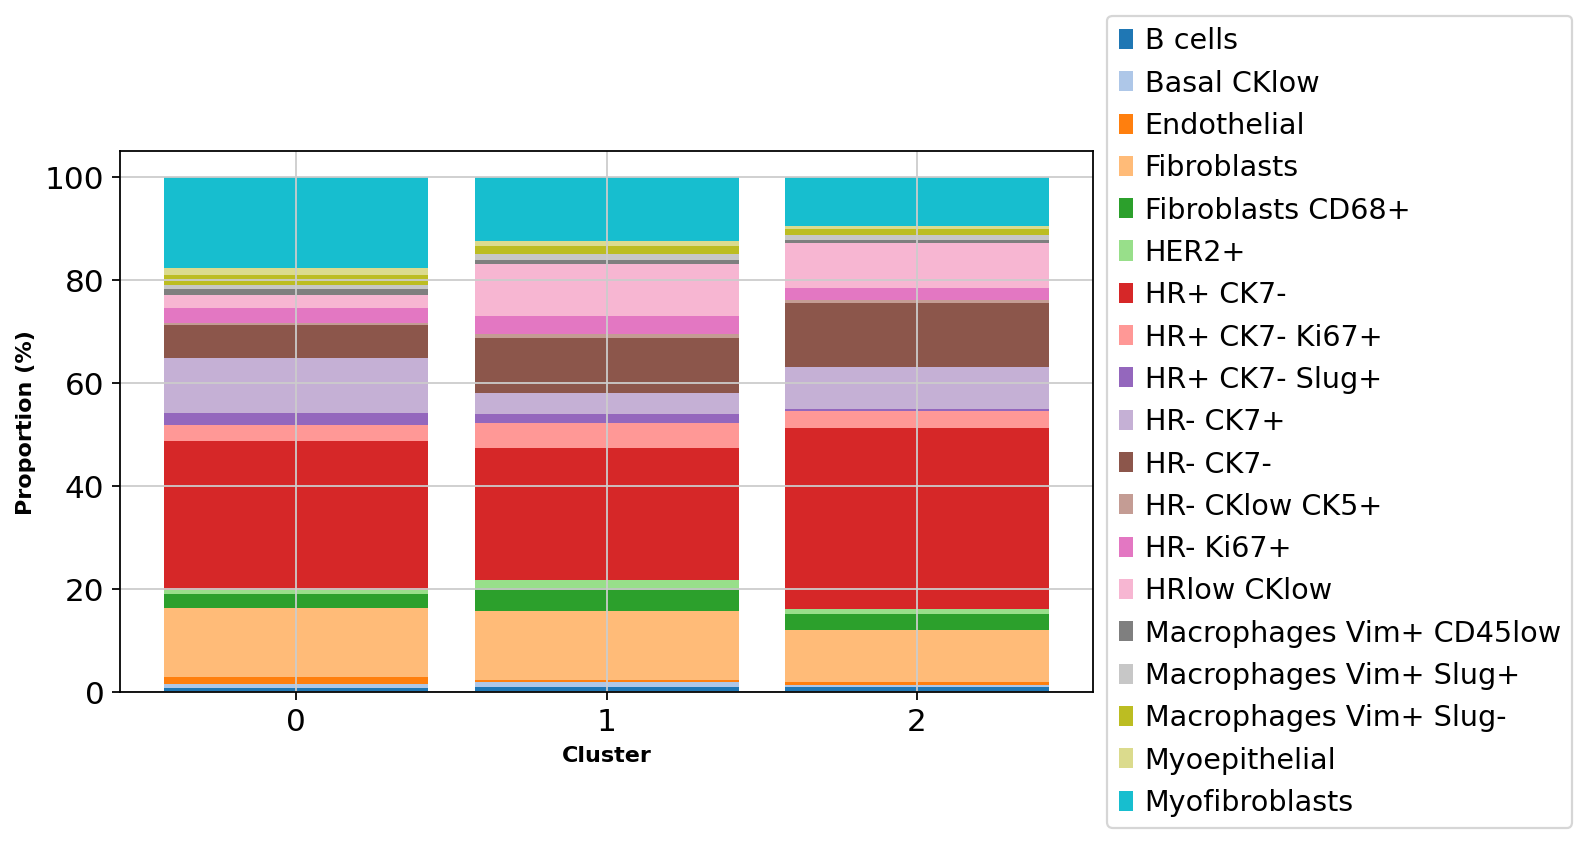

'\n# Tumor and cell type distribution\nselection = (adata_exp.obs["importance_hard"]=="True") & (adata_exp.obs["class"]=="Immune")\nplot_cell_type_proportion(adata_exp[selection,:], group_col="leiden", obs_col = "cell_type", fl_path = f"{PLT_PATH}/{dataset_name}_major_classification_prop_imp_immune.pdf")\n\nadata_selection = adata_exp[selection,:]\n\n# print(mct, adata_exp_imp_tmp)\npopulation1 = list(adata_selection[adata_selection.obs["leiden"]=="0",:].obs["cell_type"].values)\npopulation2 = list(adata_selection[adata_selection.obs["leiden"]=="2",:].obs["cell_type"].values)\nset_cell_types = set(population1) & set(population2) \n\nns = []\nfor ct in set_cell_types:\n    p_value, test_used = compare_proportions(population1, population2, cell_type=ct)\n\n    print(f"p-value: {p_value}, Test used: {test_used}")\n\n    if p_value < 0.00001:\n        #print(f"The difference in {mct} - {ct} proportions is statistically significant.")\n        pass\n    else:\n        ns.append(ct)\n       

In [18]:
adata_exp.obs["leiden_clust"] = adata_exp.obs["leiden_clust"].astype("category")
# adata_exp[adata_exp.obs["importance_hard"]=="True",:]
# plot_cell_type_proportion(adata_exp[adata_exp.obs["importance_hard"]=="True",:], group_col="leiden", obs_col = "class")
# plot_cell_type_proportion(adata_exp, group_col="leiden", obs_col = "class")

# plot_cell_type_proportion(adata_exp, group_col="leiden", obs_col = "class", fl_path = f"{PLT_PATH}/major_classification_prop_all.pdf")
# plot_cell_type_proportion(adata_exp[adata_exp, group_col="leiden", obs_col = "cell_type", fl_path=f"{PLT_PATH}/cell_class_prop_imp.pdf")

plot_cell_type_proportion(adata_exp[adata_exp.obs["importance_hard"]=="True",:], group_col="leiden_clust", obs_col = "cell_type", fl_path = f"{PLT_PATH}/{dataset_name}_major_classification_prop_imp.pdf")
# plot_cell_type_proportion(adata_exp[adata_exp.obs["importance_hard"]=="False",:], group_col="leiden", obs_col = "class", fl_path = f"{PLT_PATH}/{dataset_name}_major_classification_prop_notimp.pdf")
# plot_cell_type_proportion(adata_exp[adata_exp.obs["importance_hard"]=="True",:], group_col="leiden", obs_col = "cell_type", fl_path=f"{PLT_PATH}/cell_class_prop_imp.pdf")
# plot_cell_type_proportion(adata_exp, group_col="leiden", obs_col = "cell_type")


# Tumor and cell type distribution
# selection = (adata_exp.obs["importance_hard"]=="True") & (adata_exp.obs["class"]=="Tumor")
# plot_cell_type_proportion(adata_exp[selection,:], group_col="leiden_clust", obs_col = "cell_type", fl_path = f"{PLT_PATH}/{dataset_name}_major_classification_prop_imp_tumor.pdf")


"""
# Tumor and cell type distribution
selection = (adata_exp.obs["importance_hard"]=="True") & (adata_exp.obs["class"]=="Immune")
plot_cell_type_proportion(adata_exp[selection,:], group_col="leiden", obs_col = "cell_type", fl_path = f"{PLT_PATH}/{dataset_name}_major_classification_prop_imp_immune.pdf")

adata_selection = adata_exp[selection,:]

# print(mct, adata_exp_imp_tmp)
population1 = list(adata_selection[adata_selection.obs["leiden"]=="0",:].obs["cell_type"].values)
population2 = list(adata_selection[adata_selection.obs["leiden"]=="2",:].obs["cell_type"].values)
set_cell_types = set(population1) & set(population2) 

ns = []
for ct in set_cell_types:
    p_value, test_used = compare_proportions(population1, population2, cell_type=ct)

    print(f"p-value: {p_value}, Test used: {test_used}")

    if p_value < 0.00001:
        #print(f"The difference in {mct} - {ct} proportions is statistically significant.")
        pass
    else:
        ns.append(ct)
        print(f"The difference in {ct} proportions is not statistically significant.")

# plot_cell_type_proportion(adata_exp[(adata_exp.obs["importance_hard"]=="True") & (adata_exp.obs["class"]=="Tumor") ,:], group_col="leiden", obs_col = "cell_type", fl_path=f"{PLT_PATH}/cell_class_prop_imp.pdf")

"""


<h1>Clinical Subtype Analysis - Low vs. High Survivors</h1>

In [17]:
clinical_type = "HR+HER2-"
adata_emb_clinical_subtype = adata_emb[adata_emb.obs["clinical_type"]==clinical_type,:].copy()
upper_quartile = int(np.quantile(adata_emb_clinical_subtype.obs["osmonth"], 0.75))
lower_quartile = int(np.quantile(adata_emb_clinical_subtype.obs["osmonth"], 0.25))

adata_emb_clinical_subtype.obs["high_surv"]="0"
adata_emb_clinical_subtype.obs["low_surv"]="0"

adata_emb_clinical_subtype.obs.loc[adata_emb_clinical_subtype.obs["osmonth"]>upper_quartile, "high_surv" ] = "1"
adata_emb_clinical_subtype.obs.loc[adata_emb_clinical_subtype.obs["osmonth"]<lower_quartile, "low_surv" ] = "1"

0 0
1 1
2 2
{'1': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), '0': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), '2': (1.0, 0.4980392156862745, 0.054901960784313725)}


'\nrcParams[\'figure.figsize\']=(10,8)\nsc.pl.umap(adata_emb_clinical_subtype, size=500, show=False, color=f"leiden_{clinical_type}", show=False, palette=color_dict, legend_loc = \'on data\')\nplt.savefig(os.path.join(PLT_PATH, f"{dataset_name}_{clinical_type}_embedding_clust_umap.pdf"), dpi=300)\nplt.clf()\nsns.boxplot(data=adata_emb_clinical_subtype.obs, x=f"leiden_{clinical_type}", y="osmonth", showfliers = False, palette= color_dict)\nplt.savefig(os.path.join(PLT_PATH, f"{dataset_name}_{clinical_type}_embedding_boxplot.pdf"), dpi=300)'

<Figure size 2568x800 with 0 Axes>

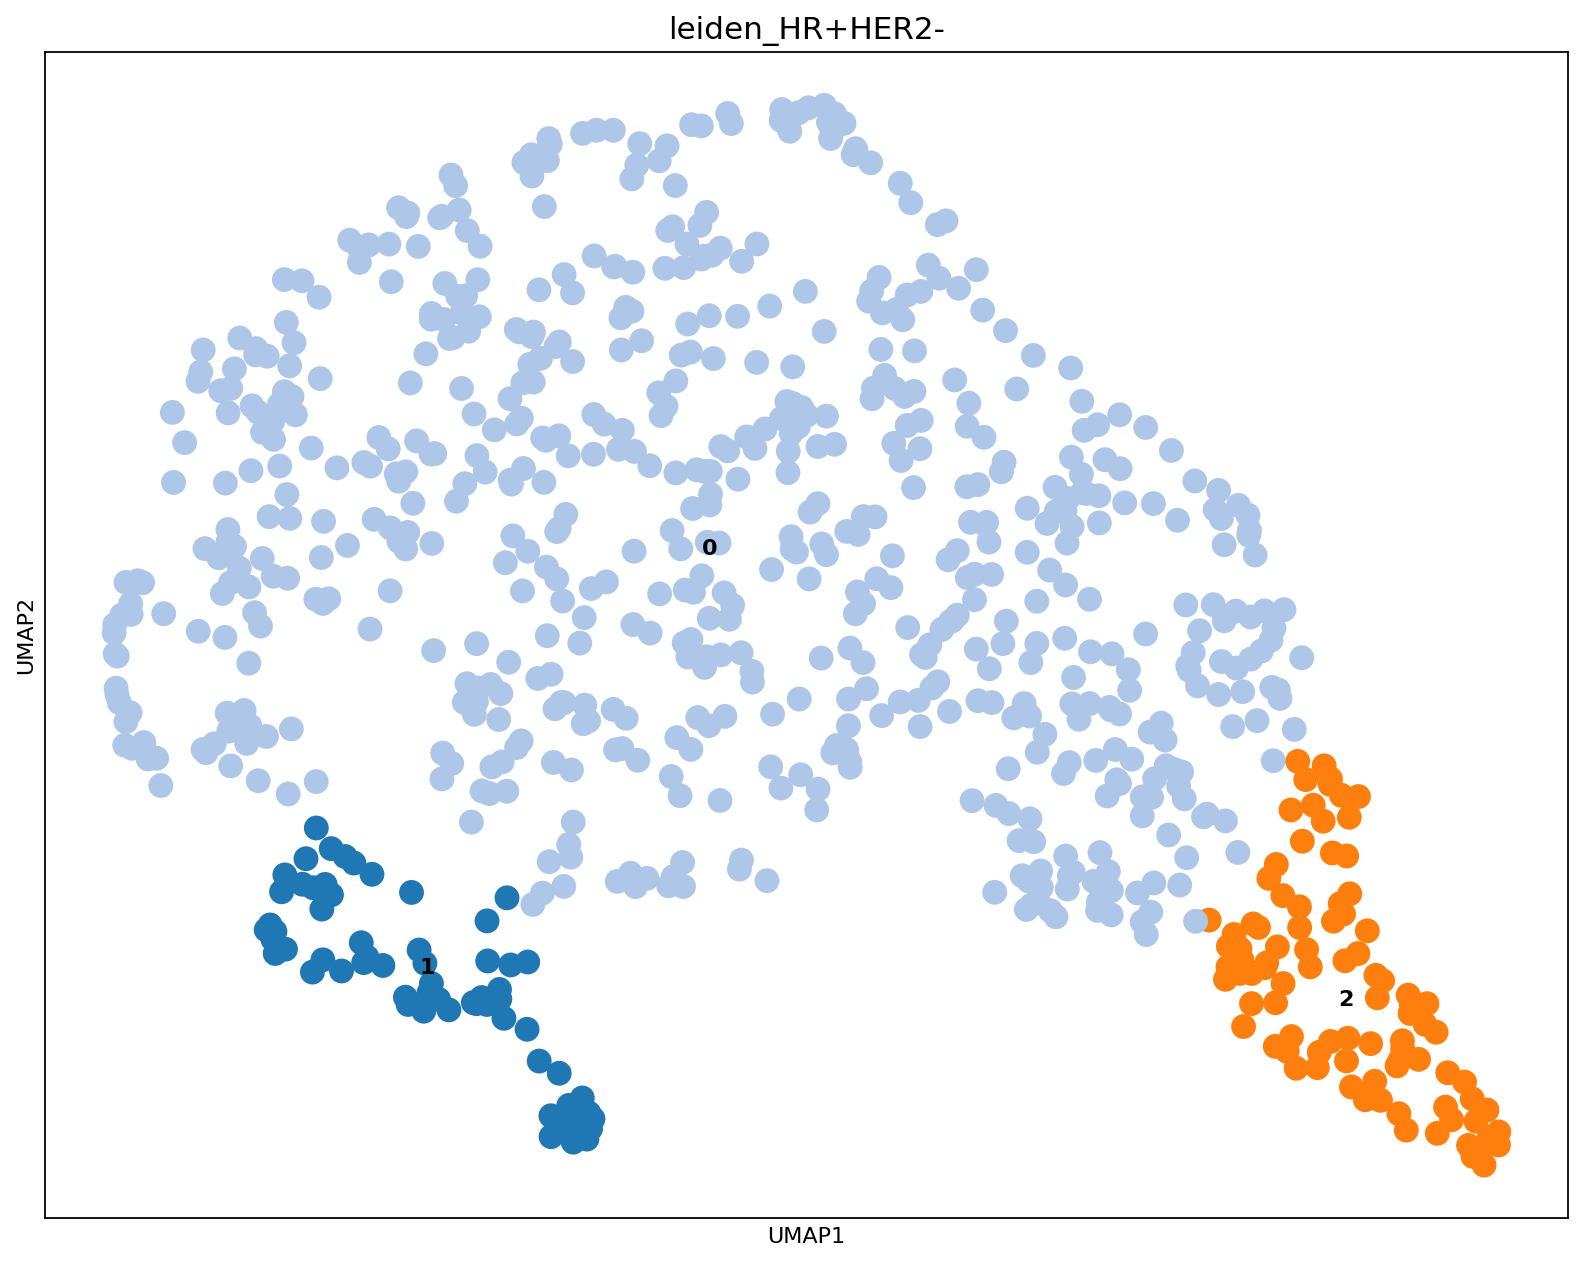

In [30]:
sc.tl.pca(adata_emb_clinical_subtype, svd_solver='arpack', random_state=0)
sc.pp.neighbors(adata_emb_clinical_subtype)
sc.tl.umap(adata_emb_clinical_subtype)

sc.tl.leiden(adata_emb_clinical_subtype, resolution=0.2, key_added = f"leiden_{clinical_type}")

new_res_param = 0.1
sc.tl.leiden(adata_emb_clinical_subtype, restrict_to=(f"leiden_{clinical_type}", ["2"]),  resolution=new_res_param, key_added=f"leiden_{clinical_type}")

adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"][adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].isin(['2,0', '0'])]='0'
adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"]=adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].astype('str').astype('category')
adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"] = adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].cat.rename_categories(np.arange(len(np.unique(adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"]))).astype('str'))


adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"][adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].isin(['0', '1'])]='0'
adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"]=adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].astype('str').astype('category')
adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"] = adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].cat.rename_categories(np.arange(len(np.unique(adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"]))).astype('str'))

adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"][adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].isin(['0', '2'])]='0'
adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"]=adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].astype('str').astype('category')
adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"] = adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].cat.rename_categories(np.arange(len(np.unique(adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"]))).astype('str'))


"""
adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"]=adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].astype('str').astype('category')
### Reorder and rename the Leiden
adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].cat.rename_categories(np.arange(len(np.unique(adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"]))).astype('str')) #, inplace=True)
"""

color_dict = dict()
map = sns.palettes.get_colormap("tab20")
color_dict = dict()

"""old_to_new = dict(
    old_cluster1='new_cluster1',
    old_cluster2='new_cluster1',
    old_cluster3='new_cluster2',
)
adata.obs['new_clusters'] = (
    adata.obs['old_clusters']
    .map(old_to_new)
    .astype('category')
)"""
"""adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"][adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].isin(["0", "3"])]="0"
adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"] = adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].cat.remove_categories(["3"])
adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"] = adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].cat.rename_categories(np.arange(len(np.unique(adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"]))).astype('str'))
"""
#for ind, clust_index in enumerate(adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].cat.categories):
#    color_dict[clust_index] = cmap.colors[ind]

for ind, clust_index in enumerate(adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].cat.categories):
    print(clust_index, ind)
    color_dict[str(len(adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"].cat.categories)-int(clust_index)-1)] = cmap.colors[ind]

color_dict = {'1': (0.12156862745098039, 0.4666666666666667, 0.7058823529411765), '0': (0.6823529411764706, 0.7803921568627451, 0.9098039215686274), '2': (1.0, 0.4980392156862745, 0.054901960784313725)}

print(color_dict)

rcParams['figure.figsize']=(15,10)
sc.pl.umap(adata_emb_clinical_subtype, size=500, show=False, color=["osmonth",f"leiden_{clinical_type}"],  palette=color_dict, legend_loc = 'on data') #  "tumor_grade", "clinical_type"
# plt.show()
plt.savefig(os.path.join(PLT_PATH, f"{dataset_name}_{clinical_type}_embedding_umap.pdf"), dpi=300)
plt.savefig(os.path.join(PLT_PATH, f"{dataset_name}_{clinical_type}_embedding_umap.png"), dpi=300)
plt.clf()

rcParams['figure.figsize']=(10,8)
sc.pl.umap(adata_emb_clinical_subtype, size=500, color=f"leiden_{clinical_type}", palette=color_dict,show=False, legend_loc = 'on data')
plt.tight_layout()
plt.savefig(os.path.join(PLT_PATH,  f"{dataset_name}_{clinical_type}_embedding_clust_umap.pdf"), dpi=300)

"""
rcParams['figure.figsize']=(10,8)
sc.pl.umap(adata_emb_clinical_subtype, size=500, show=False, color=f"leiden_{clinical_type}", show=False, palette=color_dict, legend_loc = 'on data')
plt.savefig(os.path.join(PLT_PATH, f"{dataset_name}_{clinical_type}_embedding_clust_umap.pdf"), dpi=300)
plt.clf()
sns.boxplot(data=adata_emb_clinical_subtype.obs, x=f"leiden_{clinical_type}", y="osmonth", showfliers = False, palette= color_dict)
plt.savefig(os.path.join(PLT_PATH, f"{dataset_name}_{clinical_type}_embedding_boxplot.pdf"), dpi=300)"""

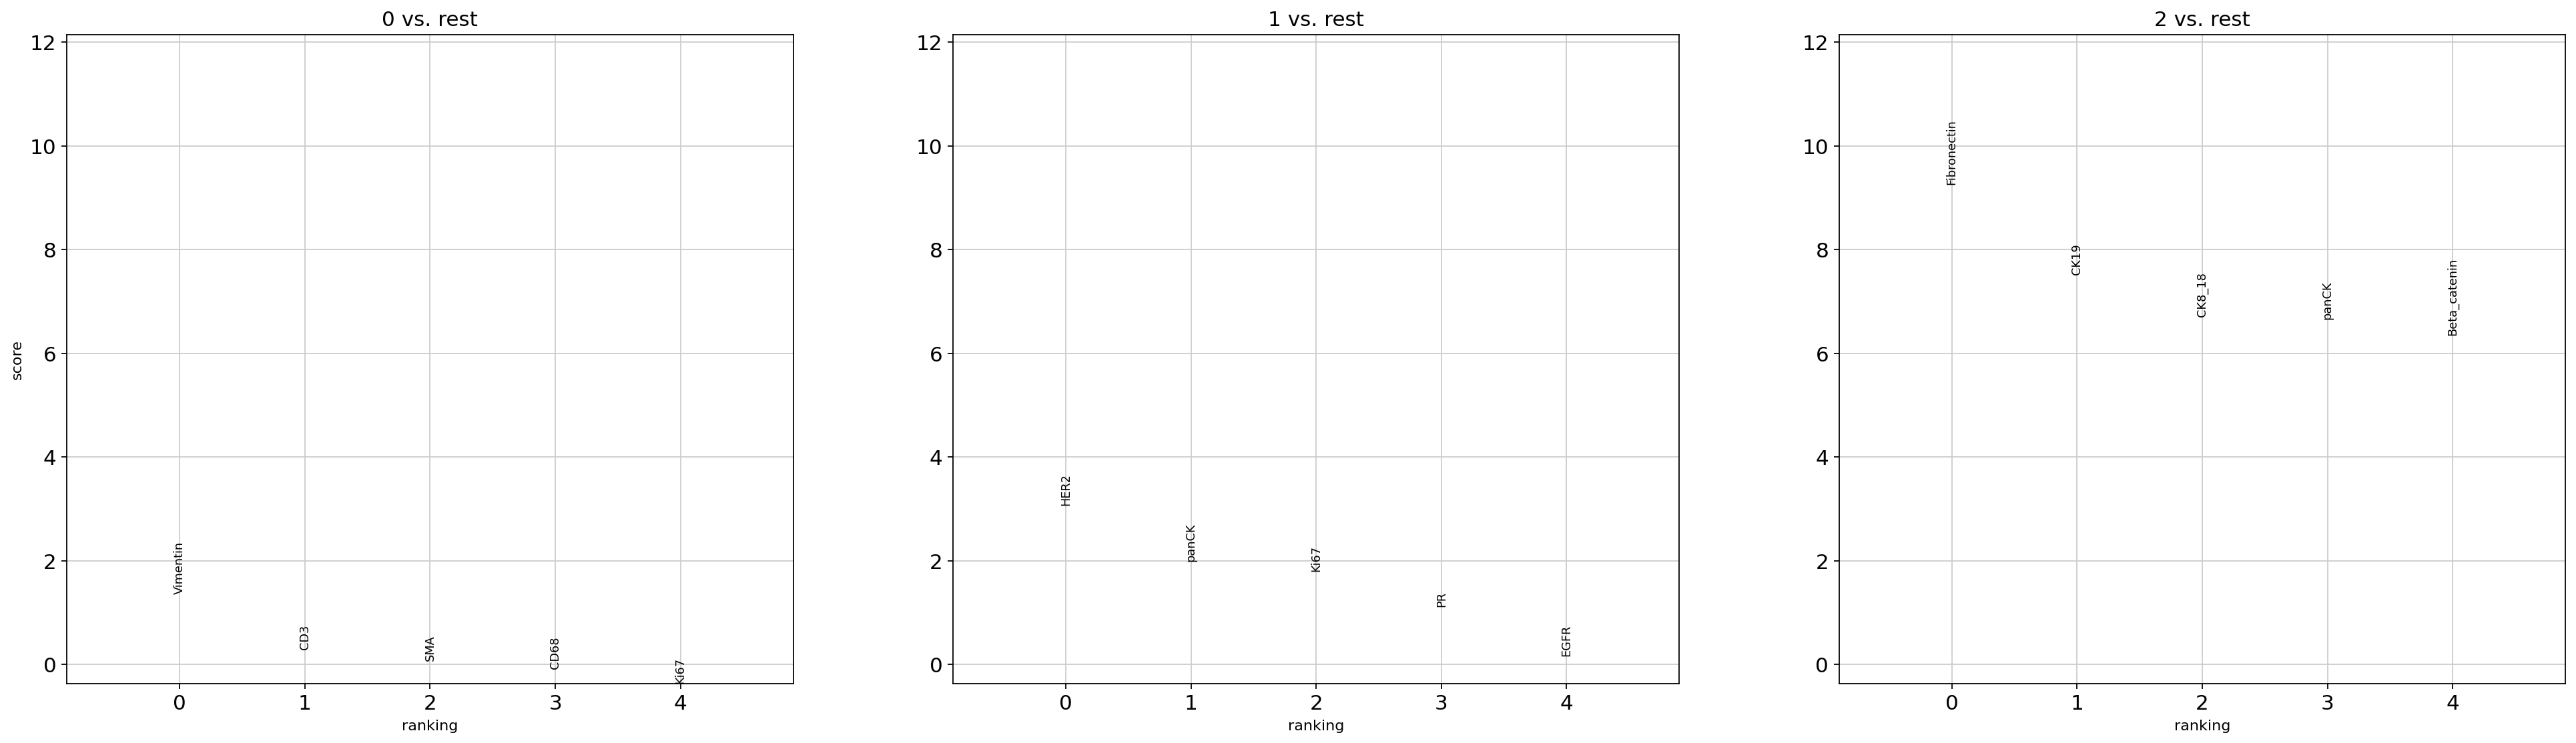

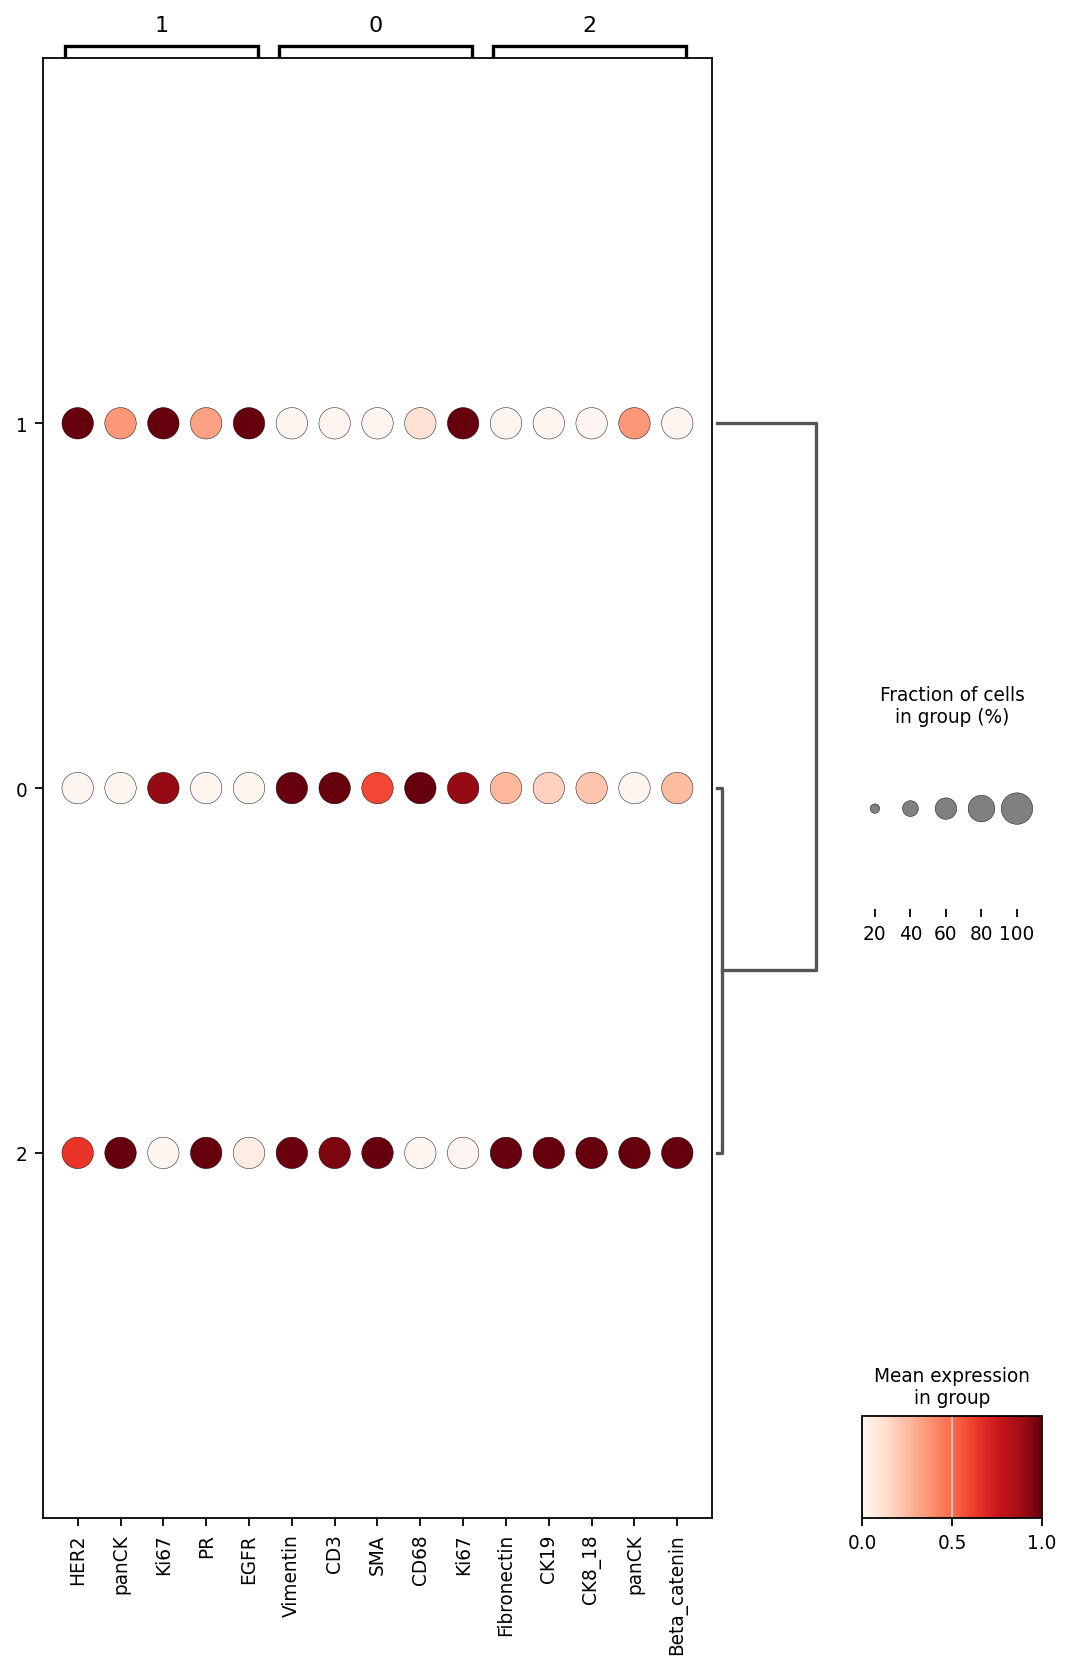

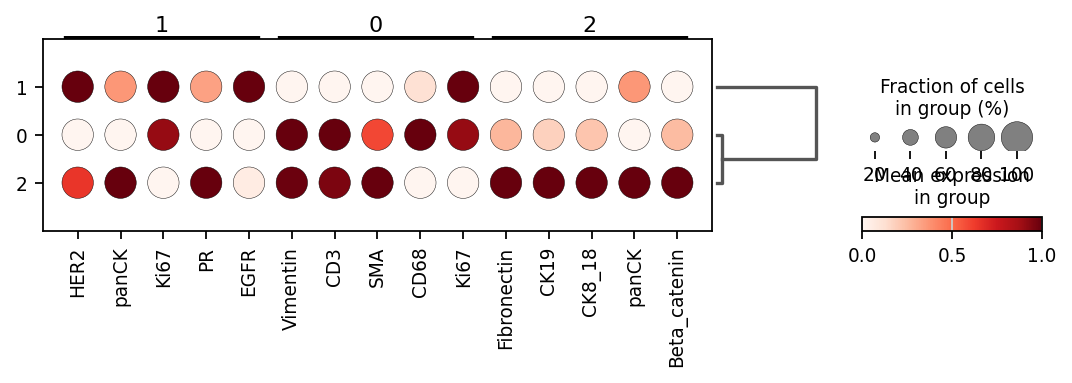

In [ ]:
pdata_clinical_subtype = pdata_imp[pdata_imp.obs_names.isin(adata_emb_clinical_subtype.obs_names),:].copy()

pdata_clinical_subtype.obs[f"leiden_{clinical_type}"] = adata_emb_clinical_subtype.obs[f"leiden_{clinical_type}"]
pdata_clinical_subtype.obsm["X_umap"] = adata_emb_clinical_subtype.obsm["X_umap"]

sc.tl.rank_genes_groups(pdata_clinical_subtype, groupby=f"leiden_{clinical_type}", sharey=False, method='wilcoxon', key_added = f"wilcoxon_{clinical_type}")
# sc.tl.rank_genes_groups(pdata_clinical_subtype, groupby=f"leiden_{clinical_type}", sharey=False, method='wilcoxon', key_added = f"wilcoxon_{clinical_type}")
# sc.tl.filter_rank_genes_groups(pdata_clinical_subtype, min_fold_change=1)
sc.tl.filter_rank_genes_groups(pdata_clinical_subtype, min_fold_change=2, key=f"wilcoxon_{clinical_type}")
plt.rcParams.update({'font.size': 10})
plt.rcParams.update({'axes.labelsize' : 10}) 

sc.pl.rank_genes_groups(pdata_clinical_subtype, n_genes=5, standard_scale='var', key=f"wilcoxon_{clinical_type}", figsize = (4,4), show=False, groupby=f"leiden_{clinical_type}")
sc.pl.rank_genes_groups_dotplot(pdata_clinical_subtype, n_genes=5, standard_scale='var', key=f"wilcoxon_{clinical_type}",  figsize = (8,12),  show=False, groupby=f"leiden_{clinical_type}")
sc.pl.rank_genes_groups_dotplot(pdata_clinical_subtype, n_genes=5, standard_scale='var', key=f"wilcoxon_{clinical_type}",  figsize = (8,12),  show=False, groupby=f"leiden_{clinical_type}")
plt.tight_layout()
plt.gcf().subplots_adjust(top = 0.60, bottom=0.50)
plt.savefig(os.path.join(PLT_PATH, f"{dataset_name}_psedu_imp_{clinical_type}_dotplot.pdf"), dpi=300)


<h1> Low survivals important vs. High Importance</h1>

49


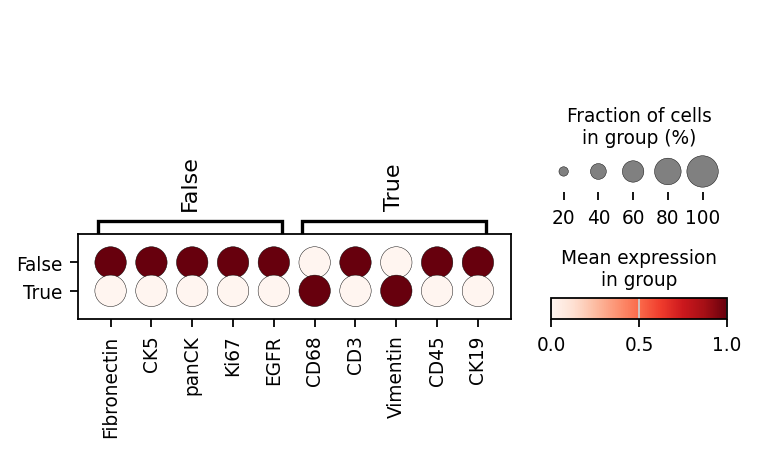

In [22]:
# pdata_imp_vs_unimp.obs

lower_quartile = int(np.quantile(pdata_imp_vs_unimp.obs["osmonth"], 0.25))
print(lower_quartile)
pdata_lower = pdata_imp_vs_unimp[pdata_imp_vs_unimp.obs["osmonth"]<lower_quartile,:].copy()
with plt.rc_context():
    sc.tl.rank_genes_groups(pdata_lower, groupby=f"importance_hard", method='wilcoxon', key_added = f"wilcoxon_importance_hard")
    sc.pl.rank_genes_groups_dotplot(pdata_lower, n_genes=5, standard_scale='var', key=f"wilcoxon_importance_hard", show=False, groupby="importance_hard")
    plt.tight_layout()
    plt.savefig(os.path.join(PLT_PATH, f"{dataset_name}_psedu_imp_vs_unimp_dotplot.pdf"), dpi=300, bbox_inches='tight')
    plt.savefig(os.path.join(PLT_PATH, f"{dataset_name}_psedu_imp_vs_unimp_dotplot.png"), dpi=300, bbox_inches='tight')


In [23]:
lower_quartile

49